In [2]:
### FACE MESH DETECTION ###
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mpFaceMesh = mp.solutions.face_mesh
face_mesh = mpFaceMesh.FaceMesh(
    static_image_mode=True, max_num_faces=5
)
mpDraw = mp.solutions.drawing_utils
mpDrawStyles = mp.solutions.drawing_styles
fm_con = mp.solutions.face_mesh_connections

Num Points : 468


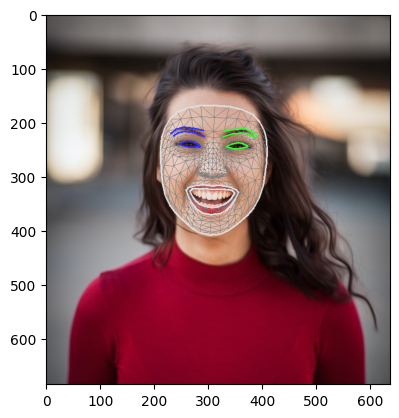

In [4]:
img = cv.imread('Resources/Photos/lady.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
results = face_mesh.process(img_rgb)
for landmarks in results.multi_face_landmarks:
    print('Num Points :', len(landmarks.landmark))
    mpDraw.draw_landmarks(
        img_rgb, 
        landmarks,
        fm_con.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mpDrawStyles.get_default_face_mesh_tesselation_style()
    )
    mpDraw.draw_landmarks(
        img_rgb, 
        landmarks,
        fm_con.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mpDrawStyles.get_default_face_mesh_contours_style()
    )
plt.imshow(img_rgb)

LEFT EYE :: [384, 385, 386, 387, 388, 390, 263, 362, 398, 466, 373, 374, 249, 380, 381, 382]
RIGHT EYE :: [160, 33, 161, 163, 133, 7, 173, 144, 145, 246, 153, 154, 155, 157, 158, 159]
LEFT EYE RP:: [362, 385, 387, 263, 373, 380]
RIGHT EYE RP:: [33, 160, 158, 133, 153, 144]
LEFT EYE EAR : 0.2519665557288684
RIGHT EYE EAR : 0.2469223721892432
Eye Aspect Ratio : 0.24944446395905578


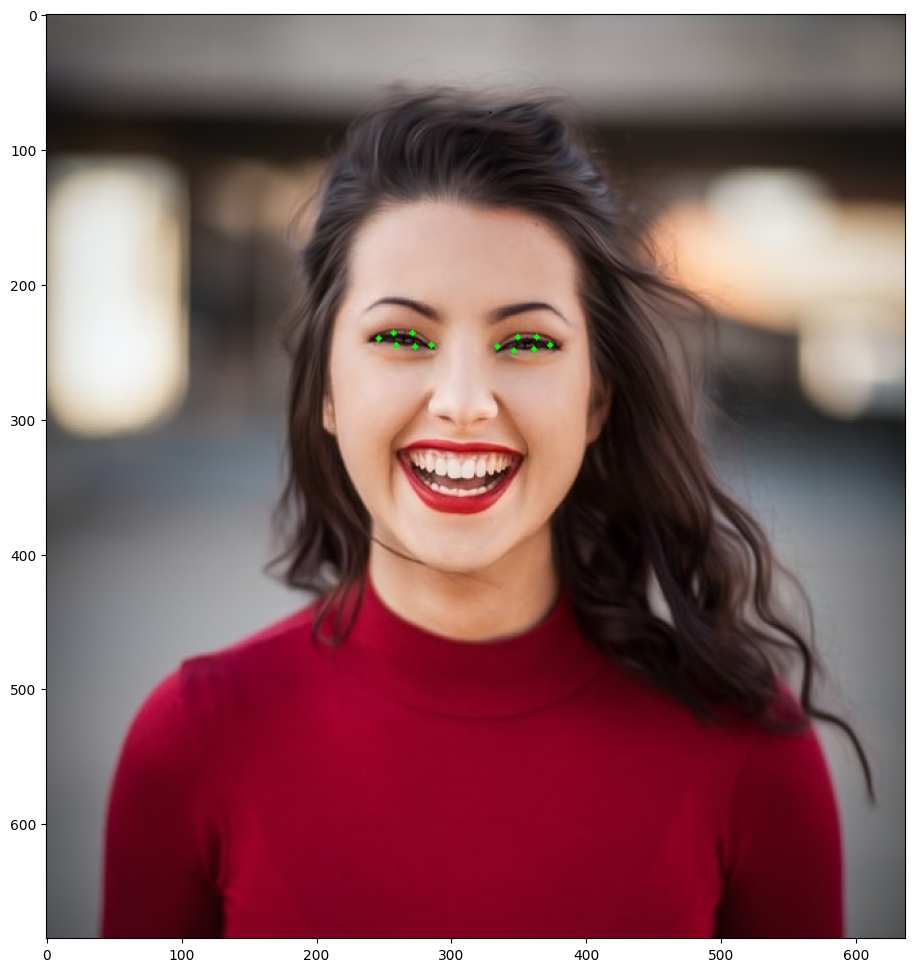

In [8]:
import numpy as np
import math

def euclidean_dist(p1, p2):
    return math.sqrt(
        ((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2)
    )
    
img = cv.imread('Resources/Photos/lady.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
LEFT_EYE_IDX = list(set(np.ravel(list(fm_con.FACEMESH_LEFT_EYE))))
RIGHT_EYE_IDX = list(set(np.ravel(list(fm_con.FACEMESH_RIGHT_EYE))))
ALL_EYE_IDX = LEFT_EYE_IDX + RIGHT_EYE_IDX
print('LEFT EYE :: {0}'.format(LEFT_EYE_IDX))
print('RIGHT EYE :: {0}'.format(RIGHT_EYE_IDX))
LEFT_EYE_RP = [362, 385, 387, 263, 373, 380]
RIGHT_EYE_RP = [33, 160, 158, 133, 153, 144]
print('LEFT EYE RP:: {0}'.format(LEFT_EYE_RP))
print('RIGHT EYE RP:: {0}'.format(RIGHT_EYE_RP))
ALL_EYE_RP = LEFT_EYE_RP + RIGHT_EYE_RP

h, w = img_rgb.shape[:-1]
for idx in ALL_EYE_RP:
    lm = landmarks.landmark[idx]
    x, y = int(lm.x * w), int(lm.y * h)
    cv.circle(img_rgb, (x, y), 2, [0, 255, 0], -1)

def calculate_ear(eye_rp):
    EAR_IDX = [(0, 3), (1, 5), (2, 4)]
    EAR_VAL = []
    for idx in EAR_IDX:
        point1 = landmarks.landmark[eye_rp[idx[0]]]
        point1 = [int(point1.x * w), int(point1.y * h)]
        point2 = landmarks.landmark[eye_rp[idx[1]]]
        point2 = [int(point2.x * w), int(point2.y * h)]
        EAR_VAL.append(euclidean_dist(point1, point2))
    return (EAR_VAL[1] + EAR_VAL[2]) / (2.0 * EAR_VAL[0])

LEFT_EAR_VAL = calculate_ear(LEFT_EYE_RP)
print('LEFT EYE EAR :', LEFT_EAR_VAL)
RIGHT_EAR_VAL = calculate_ear(RIGHT_EYE_RP)
print('RIGHT EYE EAR :', RIGHT_EAR_VAL)
AVG_EAR_VAL = (LEFT_EAR_VAL + RIGHT_EAR_VAL) / 2
print('Eye Aspect Ratio :', AVG_EAR_VAL)

plt.subplots(figsize=(12, 12))
plt.imshow(img_rgb)